In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [0]:
housing_data = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5743,-118.26,34.17,20.0,5949.0,1417.0,2593.0,1337.0,3.8576,318600.0,<1H OCEAN
13593,-117.28,34.11,39.0,1573.0,418.0,1258.0,359.0,1.4896,69500.0,INLAND
17056,-122.25,37.48,45.0,2743.0,390.0,974.0,400.0,7.1621,500001.0,NEAR OCEAN
12131,-117.22,33.93,14.0,5104.0,1026.0,3513.0,972.0,3.2148,117000.0,INLAND
11015,-117.82,33.77,27.0,2578.0,314.0,976.0,340.0,7.1882,359200.0,<1H OCEAN


In [8]:
housing_data.shape


(20640, 10)

In [0]:
housing_data = housing_data.dropna()

In [10]:
housing_data.shape

(20433, 10)

In [11]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [0]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)


In [24]:
housing_data.shape

(19475, 10)

In [25]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
house_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [0]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [30]:
housing_data.shape

(19475, 14)

In [31]:
house_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12976,-121.31,38.67,27.0,1998.0,353.0,970.0,343.0,4.8224,115500.0,0,1,0,0,0
5647,-118.29,33.74,29.0,1503.0,411.0,1368.0,390.0,2.1473,195300.0,0,0,0,0,1
16665,-120.70,35.28,14.0,3768.0,682.0,1884.0,664.0,4.6071,239900.0,0,0,0,0,1
13243,-117.65,34.14,9.0,3877.0,490.0,1815.0,490.0,8.4839,406700.0,0,1,0,0,0
752,-122.07,37.67,28.0,2932.0,739.0,1198.0,624.0,3.2417,210800.0,0,0,0,1,0


In [0]:
x = housing_data.drop('median_house_value', axis = 1)

In [0]:
y = housing_data['median_house_value']

In [34]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
x_train.shape 

(15580, 13)

In [38]:
x_test.shape

(3895, 13)

In [39]:
y_train.shape

(15580,)

In [40]:
y_test.shape

(3895,)

In [0]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [42]:
print("Training_score: ", linear_model.score(x_train, y_train))

Training_score:  0.6088978608653635


In [45]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [47]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -25841.112410
longitude                     -24400.181087
latitude                      -22487.985466
population                       -29.914198
total_rooms                       -7.297809
households                        40.194974
total_bedrooms                    93.554845
housing_median_age               887.751829
ocean_proximity_NEAR BAY        6274.883555
ocean_proximity_<1H OCEAN      13147.661805
ocean_proximity_NEAR OCEAN     16567.951217
median_income                  38510.514431
ocean_proximity_ISLAND        239942.209097
dtype: float64


In [0]:
y_pred = linear_model.predict(x_test)

In [54]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
9721,267835.718069,322900.0
13358,127424.570071,150200.0
17710,249099.257321,181000.0
740,227799.279628,184000.0
683,217832.335753,219200.0
9097,213371.842601,156700.0
6330,233714.556524,284000.0
632,191703.413137,144800.0
14299,156119.329044,139400.0
418,319187.137498,344000.0


In [56]:
from sklearn.metrics import r2_score
print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.6287442153096523


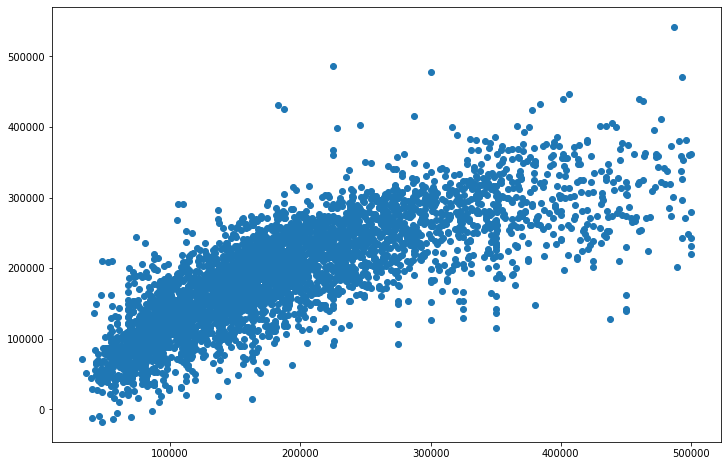

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.show()

In [0]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [59]:
df_pred_actual_sample.head()

,index,predicted,actual
0,11066,188347.657972,193800.0
1,20391,285742.527208,264600.0
2,3893,253813.217196,189800.0
3,12077,294459.048173,257900.0
4,8780,234941.219936,279900.0


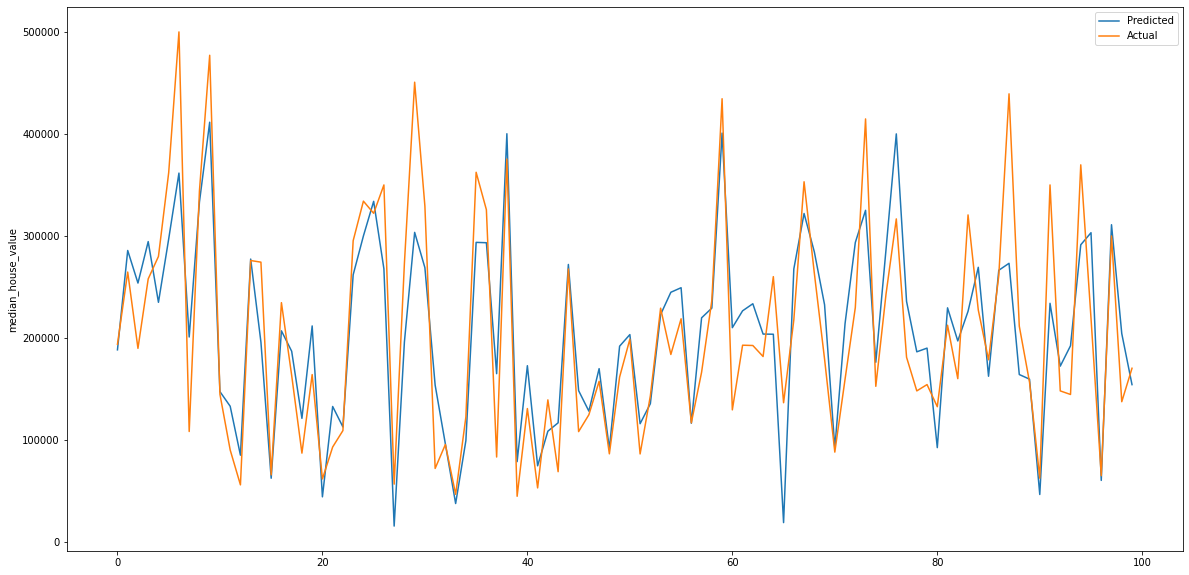

In [61]:
plt.figure(figsize = (20,10))
plt.plot(df_pred_actual_sample['predicted'], label = 'Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()